In [1]:
import json
from pprint import pprint
from termcolor import colored
from colored import fg, bg, attr
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# if using a Jupyter notebook, includue:
%matplotlib inline
data_file = "predictor_result/train_hard_pred.jsonl"
id2name = "../data/id2name.json"

color = bg('yellow_1') + fg('black')
reset = attr('reset')
blue = "blue"
green = "green"

print()

with open(id2name, 'r') as fp:
    id2name = json.load(fp)


In [2]:
def change_word_by_entity(entity_str, this_sentence,i,color):
        if list(map(lambda x: x.lower(), this_sentence[i:i + len(entity_str.split(" "))])) == entity_str.split():
            this_sentence = this_sentence[:i] + [colored(w, color, attrs=['bold']) for w in entity_str.split()] + \
                            this_sentence[i + len(entity_str.split(" ")):]
        return this_sentence


In [3]:
preffix = ""
def _show_sentence(head,tail,this_sentence,relation,correct_relation = None, is_prediction = False,prob : str = "",score: str = ""):
    print(preffix + "head:", colored(head, 'blue', attrs=['bold']), "  ,  ", "tail", colored(tail, 'green', attrs=['bold']))          
    this_sentence = this_sentence.split()
    for i, word in enumerate(this_sentence):
            if word.lower() == head.split()[0]:
                this_sentence = change_word_by_entity(head, this_sentence,i,blue)
            if word.lower() == tail.split()[0]:
                this_sentence = change_word_by_entity(tail, this_sentence,i,green)
    color = 'yellow' if correct_relation is None or relation == correct_relation else 'grey'
    if is_prediction: color = "red"
    if len(prob) > 0:
        print(preffix + colored(relation, color,attrs=['bold']) + "\t", " ".join(this_sentence) +" " + colored(prob, "magenta",attrs=['bold'])+"; "+ 
              colored(score, "magenta",attrs=['bold']))
    else:
        print(preffix + colored(relation, color,attrs=['bold']) + "\t", " ".join(this_sentence))

In [4]:
def show_set(data):
    correct_relation = data['correct_relation']
    prediction = data["prediction"]
    query = data['query']
    head = data['query_head']
    tail = data['query_tail']
    probability = data['probability'].replace("'","")[1:-1].split(",")
    scores = data['scores']
    _show_sentence(head,tail,query,correct_relation)
    print()

    for k in range(5):
        this_sentence = data["sentence_" +str(k)]
        head = data['sentence_'+str(k)+'_head']
        tail = data['sentence_'+str(k)+'_tail']
        relation = data['sentence_'+str(k)+'_relation']
        _show_sentence(head,tail,this_sentence,relation,correct_relation,  k == int(prediction),probability[k],
                       "{:.2f}".format(scores[k]))
    print()
    return correct_relation
        

In [5]:
total_wrong = 0
total_correct = 0
result_per_type = {}
correct_scroes = []
wrong_scores = []
pred_list = []
gold_list = []
wrong_prediction_which_rel = {}
with open(data_file) as f:
    for ex_index,line in enumerate(f,1):
        data = json.loads(line)
        scores = data['scores']
        pred_rel = data['sentence_' + data["prediction"] +'_relation']
        pred_score = scores[int(data["prediction"])]
        the_gold_rel = data['correct_relation']
        gold_list.append(the_gold_rel)
        pred_list.append(pred_rel)
        if data['answer'] == "wrong":
            assert pred_rel != the_gold_rel
            if not the_gold_rel in wrong_prediction_which_rel:
                wrong_prediction_which_rel[the_gold_rel] = Counter()
            wrong_prediction_which_rel[the_gold_rel].update([pred_rel])
            total_wrong +=1
            print("wrong example number: ",total_wrong,  "example number: ", ex_index)
            show_set(data)
            print()
            wrong_scores.append(pred_score)
            result_per_type[the_gold_rel] = result_per_type.get(the_gold_rel,[[],[]])
            result_per_type[the_gold_rel][0].append(data)
            
            
        else:
            result_per_type[the_gold_rel] = result_per_type.get(the_gold_rel,[[],[]])
            result_per_type[the_gold_rel][1].append(data)
            correct_scroes.append(pred_score)
            total_correct +=1





wrong example number:  1 example number:  5
head: db5   ,   tail db6
followed by	 The Aston Martin DB4 , the db5 ( famously driven by fictional character James Bond ) and the db6 were named after David Brown ’s initials .

head: group g   ,   tail sweden
participant	 Group H Russia were placed in group g of UEFA Euro 2016 qualifying alongside sweden , Austria , Montenegro , Moldova and Liechtenstein . 0.00; 108.09
head: bacteroidales   ,   tail order
taxon rank	 The order bacteroidales comprises nine families of environmental bacteria  0.00; 117.41
head: strands of starlight   ,   tail maze of moonlight
followed by	 The other novels are " strands of starlight " , " maze of moonlight " , and " Strands of Sunlight " .  0.00; 112.73
head: craig borten   ,   tail academy award for best original screenplay
nominated for	 Wallack and fellow screenwriter craig borten were nominated for an academy award for best original screenplay for the 2013 film " Dallas Buyers Club " .  0.00; 99.53
head: 

field of work	 His lecturers at Berlin included mommsen , Nitzsch and Droysen for history , Kiepert for Geography , Johannes Schmidt for Indo - German languages , Albrecht Weber for Sanskrit and Philosophy of language with Steinthal .

head: marsia   ,   tail elegy
said to be the same as	 Sachay ’s father Syed Yarwar Hussain was also a renowned religious poet and a number of elegy ( marsia ) and Nauha are to his credit . 1.00; 137.54
head: réseau breton tank locomotives   ,   tail société franco-belge
manufacturer	 The réseau breton tank locomotives were a class of locomotives of which five were built in 1904 for the Réseau Breton railway by Société Franco - Belge at its Raismes factory .  0.00; 111.56
head: trustworthy repositories audit & certification   ,   tail digital preservation
field of work	 The OAIS has been the basis of numerous prominent digital preservation initiatives and standards including the working group and the trustworthy repositories audit & certification ( TRAC )

head: hackensackumc   ,   tail mountainside hospital
subsidiary	 hackensackumc Mountainside , also known as mountainside hospital , is a community hospital with a university affiliation located in Montclair , New Jersey , United States .  0.00; 97.99
head: john hagelin   ,   tail transcendental meditation
field of work	 In 1992 , Scranton donated $ 1,000 to the campaign of his friend john hagelin , the Pittsburgh - born presidential candidate for the transcendental meditation - backed Natural Law Party .  0.99; 120.92


wrong example number:  53 example number:  365
head: public official a   ,   tail blagojevich
said to be the same as	 blagojevich was widely rumored to be the unnamed " public official a " mentioned in the Rezko indictment .

head: fatra-tatra area   ,   tail mountain range
instance of	 The Strážov Mountains ( ) are a mountain range in northwestern Slovakia , being part of Inner Western Carpathians , and of the Fatra - Tatra Area . 0.00; 99.96
head: gamersgate   ,   tai

nominated for	 The film shared Grand Prix honors at the 1946 Cannes film festival and garnered Lean his first Academy nominations for directing and screen adaptation , and celia johnson a nomination for best actress .  0.00; 106.45
head: lucia   ,   tail lucy
said to be the same as	 Alternative spellings and related names are : Luci , lucy , Lucey , Lucie , lucia , Luke .  0.99; 124.14


wrong example number:  95 example number:  720
head: health trust   ,   tail norway
applies to jurisdiction	 Vestfold Hospital Trust ( ) is a public health trust which serves Vestfold , norway .

head: stade richter   ,   tail montpellier hsc
occupant	 It was the home ground of the montpellier hsc until their next stadium stade richter opened in 1968 . 0.00; 87.27
head: state representative   ,   tail montana
applies to jurisdiction	 He ran for Governor of montana in 1992 , but lost in the Democratic primary to former state representative Dorothy Bradley , who in turn lost the general election to Marc 

head: ramshackle house   ,   tail producers distributing corporation
distributor	 It was released by producers distributing corporation ( PDC).The AFI Catalog of Feature Films : " ramshackle house " 0.00; 83.38
head: bob devaney sports center   ,   tail university of nebraska-lincoln
operator	 The competition took place in Lincoln , Nebraska hosted by the University of Nebraska - Lincoln in the bob devaney sports center .  0.00; 91.02
head: 1997 nhl entry draft   ,   tail civic arena
location	 New York 's picks at the 1997 nhl entry draft in Pittsburgh , Pennsylvania at the civic arena .  0.00; 109.43
head: global risk management   ,   tail middelfart
headquarters location	 global risk management has branches in Copenhagen & Singapore , while its headquarters remain in middelfart .  1.00; 116.45
head: grandia online   ,   tail noriyuki iwadare
composer	 Background music for " grandia online " was written by series veteran noriyuki iwadare , the composer for all previous " Grandia " tit

head: 1987   ,   tail olympic club
location	 This was the fourth U.S. Open at the Lake Course of the olympic club ; the first two in 1955 and 1966 ended in playoffs , and 1987 was a one - stroke victory .  0.00; 100.92
head: time after time   ,   tail she bop
followed by	 Two Cyndi Lauper videos , " time after time " and " she bop " , won in six different categories , and Lauper did attend the ceremony and received her awards on stage .  0.99; 126.14
head: the killing   ,   tail netflix
distributor	 In 2014 , he played Lincoln Knopf on the fourth and final season of the netflix series , " the killing " .  0.00; 107.43
head: corypheae   ,   tail tribe
taxon rank	 In a previous classification , prior to the discovery of " Tahina " , the three other genera were placed in tribe corypheae , subtribe Coryphinae , together with the genus " Corypha " .  0.00; 111.32


wrong example number:  148 example number:  1054
head: blue period   ,   tail rose period
followed by	 Picasso 's work had pass

head: louise herschman mannheimer   ,   tail new york city
residence	 Jennie Mannheimer was born in new york city , the daughter of louise herschman mannheimer and Sigmund Mannheimer .  0.00; 105.57


wrong example number:  158 example number:  1144
head: zone corporation   ,   tail stephen king
owned by	 WKIT is part of the zone corporation , a central Maine broadcasting group owned by authors Tabitha and stephen king .

head: karigaila   ,   tail jogaila
sibling	 The Crooked Castle was captured and its commander , karigaila , brother of jogaila , was killed . 0.00; 103.84
head: messers run   ,   tail negro hollow
tributary	 messers run is flanked by areas prone to flooding during a 100 year flood from the mouth of negro hollow upstream to its headwaters .  0.70; 108.93
head: reason to believe   ,   tail myspace records
record label	 In March 2008 myspace records released Pennywise 's ninth album , " reason to believe " .  0.29; 108.05
head: joe albi stadium   ,   tail spokane
owned b

wrong example number:  200 example number:  1502
head: just blaze   ,   tail roc-a-fella records
record label	 Singles included " No Better Love " featuring former Roc - A - Fella Records crooner Rell and the just blaze - produced " Friday Night " .

head: rain without thunder   ,   tail orion classics
distributor	 orion classics released " rain without thunder " on February 5 , 1993 , in Los Angeles . 0.00; 107.28
head: nachrichten   ,   tail german language
language of work or name	 Israel - nachrichten ( meaning " Israel news " ) was a german language daily newspaper published in Tel Aviv .  0.00; 104.96
head: masaki yamada   ,   tail bass
instrument	 Hiro Homma is currently the drummer for the Japanese metal band Anthem and vocalist masaki yamada is now the bass player for the New York - based band FiRESiGN .  1.00; 120.52
head: from here we go sublime   ,   tail kompakt
record label	 " from here we go sublime " was released on compact disc and vinyl record by kompakt .  0.00; 112.

head: saint-gobain   ,   tail bpb plc
subsidiary	 In 1990 he moved to bpb plc , the British firm which is the world 's largest manufacturer of plasterboard and now owned by the French company Saint - Gobain .  0.00; 109.52
head: fredrika bremer   ,   tail stockholm
work location	 In 1853 , she co - founded the " Stockholms fruntimmersförening för barnavård " ( stockholm women 's fund for child care ) with fredrika bremer .  0.08; 137.57
head: wrbq-fm   ,   tail tampa, florida
licensed to broadcast to	 Ten months later , Kimmel and Voss were fired by KZOK and were fired again a year later at WRBQ - FM in Tampa , Florida .  0.00; 124.35


wrong example number:  211 example number:  1589
head: 41st chess olympiad   ,   tail tromsø
location	 In 2014 , Sethuraman took team bronze medal with the Indian team at the 41st chess olympiad in tromsø and won the Indian National Premier Championship .

head: university of hawaii   ,   tail hilo branch
subsidiary	 He was also instrumental in getting 

wrong example number:  261 example number:  1890
head: byrd station   ,   tail united states antarctic research program
operator	 Brown , united states antarctic research program meteorologist at byrd station in 1963 .

head: the last supper   ,   tail mural
instance of	 The church contains the mural of " the last supper " by Leonardo da Vinci , which is in the refectory of the convent . 0.00; 101.20
head: barys astana   ,   tail kontinental hockey league
league	 On June 11 , 2013 , Lundin signed with barys astana of the kontinental hockey league , according to the team 's website .  0.12; 113.61
head: holt arena   ,   tail idaho state university
owned by	 Held annually in February at holt arena , on the campus of idaho state university in Pocatello , Idaho , it is sponsored by the J.R. Simplot Company .  0.69; 115.39
head: the lego movie   ,   tail mark mothersbaugh
composer	 mark mothersbaugh , who composed the score for " the lego movie " , returned to score " The Lego Ninjago Movie

country	 Air Italy S.p . A. , operating as Air Italy , is a privately owned italian airline headquartered in olbia with its main hub at Milan – Malpensa Airport .  0.00; 93.75
head: hibari misora   ,   tail kayōkyoku
genre	 Popular singer hibari misora died in 1989 , and many " kayōkyoku " programs , such as " The Best Ten " , were closed .  0.00; 111.47
head: danny barcelona   ,   tail drummer
instrument	 danny barcelona was introduced to Louis Armstrong by Young in 1956 and became Armstrong 's drummer for 15 years .  0.00; 102.38


wrong example number:  274 example number:  2023
head: 2010   ,   tail 2014 asian games
followed by	 He has represented his country in the 2010 and 2014 asian games , and even captained the national team in the 2014 games .

head: rory bosio   ,   tail truckee
residence	 rory bosio is currently a paediatric intensive - care nurse from truckee , California , United States . 0.00; 85.59
head: debut album   ,   tail kazemachi roman
followed by	 The success of

instance of	 Soon after , Besteiro became a member of unión general de trabajadores ( UGT ) trade union , and of the Spanish Socialist Workers ' Party ( PSOE).Jackson , Gabriel .  0.99; 125.87
head: de divinatione   ,   tail latin
language of work or name	 In 1524 , Thomaeus published a collection of philosophical dialogues in latin , the first of which was titled " Trophonius , sive , de divinatione " .  0.00; 116.51
head: premier   ,   tail yukon
applies to jurisdiction	 It is the former riding of yukon 's 5th premier , Piers McDonald .  0.01; 120.64


wrong example number:  312 example number:  2347
head: jamaica   ,   tail long island rail road
owned by	 Travelers heading to or from Kennedy Airport may use AirTrain to connect with the long island rail road in jamaica or the New York City Subway in jamaica or Howard Beach .

head: 2008   ,   tail fifa futsal world cup
sports season of league or competition	 Guatemala participated for the first time in the fifa futsal world cup in 20

head: eduard buchner   ,   tail nobel prize in chemistry
nominated for	 Zymase was first isolated from the yeast cell in 1897 by a German chemist named eduard buchner who fermented sugar in the laboratory without living cells , leading to 1907 nobel prize in chemistry . 0.00; 95.46
head: cymodoceaceae   ,   tail family
taxon rank	 Halodule is a genus of plants in the family cymodoceaceae described as a genus in 1841.Endlicher , Stephan Friedrich Ladislaus .  0.00; 104.42
head: pudukad railway station   ,   tail indian railways
owned by	 pudukad railway station is operated by the Chennai - headquartered Southern Railways of the indian railways .  0.03; 110.25
head: ohio replacement submarine   ,   tail us navy
operator	 In 2014 , Roger 's committee called for cuts in the National Nuclear Security Administration budget that cast doubt on the us navy 's ability to provide an ohio replacement submarine class .  0.97; 113.80
head: mark antony   ,   tail lucius antonius
sibling	 He was an un

taxon rank	 Osteopelta ceticola is a species of sea snail , a marine gastropod mollusk in the family osteopeltidae . 0.00; 101.16
head: before the frost   ,   tail swedish
language of work or name	 Karin Bertling also appears in the English language " Faceless Killers " and has previously worked on the swedish - language TV film " before the frost " .  0.00; 91.49
head: dzhendema   ,   tail balkan mountains
location	 It is situated under Botev Peak ( 2,376 m ) in the central section of the balkan mountains and is part of the dzhendema Reserve of the Central Balkan National Park .  0.00; 114.66
head: august krogh   ,   tail nobel prize in physiology or medicine
nominated for	 In 1920 august krogh was awarded the nobel prize in physiology or medicine for the discovery of the mechanism of regulation of the capillaries in skeletal muscle .  0.00; 92.22
head: andraș filip river   ,   tail vinul river
mouth of the watercourse	 The andraș filip river ( ) is a tributary of the vinul river in R

head: the lincoln lawyer   ,   tail michael connelly
after a work by	 2011 – the lincoln lawyer Based on the novel by michael connelly .  0.00; 85.89
head: thames television   ,   tail carlton
followed by	 After weeks of shadowing ITV , LNN debuted on air on 1 January 1993 as carlton replaced thames television as London 's weekday ITV franchise .  0.00; 108.87
head: julio iglesias   ,   tail columbia records
record label	 My Life : The Greatest Hits is a double - CD greatest hits album by julio iglesias , released in 1998 on columbia records .  0.00; 97.14
head: macbook air   ,   tail apple
manufacturer	 On January 31 , 2008 , apple released the macbook air , a thin laptop with an optional 64 GB SSD .  1.00; 143.33


wrong example number:  390 example number:  2952
head: king   ,   tail victoria
located in the administrative territorial entity	 Rivers that flow north into the Murray – Darling Basin from victoria include the Goulburn , Mitta Mitta , Kiewa , Ovens , king , Loddon and Cam

followed by	 He was a player on the British Lions ' 1980 tour to south africa and 1983 tour to new zealand .  0.00; 101.09
head: greater anglia   ,   tail london
headquarters location	 greater anglia also operate the Stansted Express service from london to Stansted Airport .  0.00; 102.36
head: wfgy   ,   tail altoona
licensed to broadcast to	 The sister stations of wfgy in the altoona market are 100.1 WWOT - FM , 103.9 WALY - FM , 104.9 WRKY - FM , 1290 WFBG - AM , and 1430 WVAM - AM .  0.00; 94.90
head: zone corporation   ,   tail stephen king
owned by	 WKIT is part of the zone corporation , a central Maine broadcasting group owned by authors Tabitha and stephen king .  0.01; 108.15


wrong example number:  432 example number:  3190
head: sulawesi   ,   tail indonesia
country	 In 2009 it succeeded in getting the city of Bau - Bau , on Buton Island in sulawesi , indonesia , to adopt hangul for the Cia - Cia language .

head: caretaker prime minister   ,   tail pakistan
country	 Quresh

head: richard leakey   ,   tail paleoanthropologist
field of work	 In 1989 richard leakey , a paleoanthropologist and conservationist from the prominent Leakey family , was named head of Kenya 's Wildlife Conservation and Management Department , the forerunner to today 's Kenya Wildlife Service .  0.00; 94.27
head: liza anne   ,   tail folk
genre	 liza anne ( born Elizabeth Anne Odachowski ) is an American folk musician from Saint Simons Island , Georgia .  0.00; 93.54
head: 1983 contest   ,   tail pas de deux
participant	 It was succeeded as Belgian representative at the 1983 contest by pas de deux performing " Rendez - vous " .  0.00; 121.07


wrong example number:  453 example number:  3351
head: five pieces for orchestra   ,   tail arnold schoenberg
composer	 The music is by arnold schoenberg ( five pieces for orchestra , Op .

head: leelai   ,   tail satish chakravarthy
composer	 The soundtrack to " Kanimozhi " was composed by satish chakravarthy , for whom it became his first the

wrong example number:  487 example number:  3689
head: sachsenhagen   ,   tail samtgemeinde
instance of	 sachsenhagen is also the seat of the " samtgemeinde " ( " collective municipality " ) sachsenhagen .

head: countess charlotte   ,   tail isle of man
residence	 When James left the isle of man he left his wife , countess charlotte – the renowned successful defender of Lathom House in 1644 – in command of the isle of man . 0.98; 111.00
head: source engine   ,   tail game engine
instance of	 For the game , Valve developed a new game engine called the source engine , which handles the game 's visual , audio , and artificial intelligence elements .  0.00; 102.18
head: fantasia on british sea songs   ,   tail henry wood
composer	 When Sir henry wood wrote his " fantasia on british sea songs " in 1905 a version of this song became the third movement .  0.00; 94.42
head: universitetsforlaget   ,   tail oslo
headquarters location	 oslo : universitetsforlaget , pp .  0.02; 107.28
head: frida

instance of	 ffrf is a nonprofit organization that promotes the separation of church and state and educates the public on matters relating to atheism , agnosticism , and nontheism . 0.01; 107.42
head: outstanding guest actress in a comedy series   ,   tail elaine stritch
winner	 For her performance in this episode , elaine stritch received a Primetime Emmy Award nomination in the category for outstanding guest actress in a comedy series .  0.99; 111.63
head: anita shapolsky gallery   ,   tail new york city
headquarters location	 : 120–143 Kotin was exhibited by the anita shapolsky gallery in new york city , McCormick Gallery , and Robert Miller Gallery - New York .  0.00; 90.58
head: reelected   ,   tail gavin newsom
successful candidate	 gavin newsom , first elected in 2003 and reelected in 2007 , was elected Lieutenant Governor of California in 2010 and sworn in on January 10 , 2011 .  0.00; 97.08
head: the thick of it   ,   tail armando iannucci
screenwriter	 The series was created 

head: 1898   ,   tail fred herd
winner	 Did not play : Harry Vardon ( 1900 ) , fred herd ( 1898 ) , Joe Lloyd ( 1897 ) , Horace Rawlins ( 1895 ) . 0.00; 115.57
head: medal of honor   ,   tail microsoft windows
platform	 Their first project was the 2010 " medal of honor " , which was released for microsoft windows , PlayStation 3 , and Xbox 360 on October 12 , 2010 .  0.00; 105.04
head: edward thomson davis   ,   tail worcester
residence	 edward thomson davis ( 1833 - 1867 ) was an English genre painter , active in worcester , England .  0.00; 85.77
head: chunichi dragons   ,   tail aichi prefecture
headquarters location	 Atsushi Fujii ( 藤井淳志 , born May 20 , 1981 in Toyohashi , aichi prefecture ) is a Japanese professional baseball outfielder for the chunichi dragons in Japan 's Nippon Professional Baseball .  0.00; 84.65
head: aliens   ,   tail james horner
composer	 Riepl ’s score was heavily influenced by Jerry Goldsmith 's work in the film " Alien " as well as james horner 's work i

head: max jammer   ,   tail physics
field of work	 Hermann 's result went unnoticed by the physics community until it was independently discovered and published by John Stewart Bell in 1966 , and her earlier discovery was pointed out by max jammer in 1974 . 0.00; 102.32
head: xest   ,   tail municipality
instance of	 Cheste ( Valencian : xest ) is a municipality in the " comarca " of Hoya de Buñol in the Valencian Community , Spain , located 26 km from the capital Valencia .  0.00; 101.15
head: gibraltar open   ,   tail marco fu
winner	 However , at the gibraltar open he whitewashed reigning world champion Stuart Bingham to reach his first European Tour final , but was defeated 4–1 by marco fu .  0.00; 98.49
head: world of zoo   ,   tail nintendo ds
platform	 " world of zoo " was released for Microsoft Windows , Wii and nintendo ds on October 26 , 2009 .  1.00; 112.41
head: banca popolare di lodi   ,   tail banco popolare
owned by	 It became a subsidiary banca popolare di lodi ( via su

head: kim gardner   ,   tail musician
occupation	 kim gardner ( 27 January 1948 in Dulwich , London – 24 October 2001 in Los Angeles ) was an English musician .  0.00; 109.87
head: great mass in c minor   ,   tail mozart
composer	 It also published the first recordings of mozart 's " great mass in c minor " and " Idomeneo".Millington , Barry .  1.00; 133.81
head: the last kingdom   ,   tail bernard cornwell
after a work by	 the last kingdom is the first historical novel in The Saxon Stories by bernard cornwell , published in 2004 .  0.00; 120.10
head: lenne   ,   tail weser
mouth of the watercourse	 The northwestern foothills of the Amtsberge are passed by the upper reaches of the River lenne ( an eastern tributary of the weser ) flowing northwest .  0.00; 100.18


wrong example number:  611 example number:  4628
head: best screenplay   ,   tail filmfare awards
instance of	 The drama film " Fashion " ( 2008 ) garnered him several accolades including filmfare awards nominations for Best

head: porcelliidae   ,   tail superfamily
taxon rank	 Wagner reported that the porcelliidae belongs to the subfamily Gosseletininae , family Gosseletinidae , in the superfamily Eotomarioidea .  0.00; 97.63
head: seahawks   ,   tail united states navy
military branch	 Carrier Airborne Early Warning Squadron 126 ( VAW-126 ) , nicknamed the " seahawks " , is a carrier airborne early warning squadron of the united states navy .  0.00; 99.05
head: "siberia"   ,   tail pop album of the year
nominated for	 " Siberia " received positive reviews and was nominated for a Juno Award for Best pop album of the year .  0.11; 116.46
head: sans plus attendre   ,   tail à tâtons
followed by	 The albums contains Spanish versions of French songs that appeared on Axelle Red 's two previous albums , " sans plus attendre " and " à tâtons " .  0.00; 100.34


wrong example number:  632 example number:  4797
head: crailsheim–heilbronn railway   ,   tail deutsche bahn
owned by	 It lies on the Crailsheim – Heilbr

head: le monde du silence   ,   tail jacques-yves cousteau
composer	 Director Lee Robinson was nominated for the Golden Palm Award at the 1956 Cannes Film Festival , but was beaten by Jacques - Yves Cousteau and Louis Malle for " le monde du silence " .  0.00; 89.90
head: schermerhorn symphony center   ,   tail nashville, tennessee
located in the administrative territorial entity	 The world premiere was given by the Nashville Symphony conducted by Giancarlo Guerrero , with cellist Zuill Bailey on April 17 , 2015 at the schermerhorn symphony center in downtown Nashville , Tennessee .  0.11; 116.62
head: crrc group   ,   tail state-owned enterprise
instance of	 The parent company of CRRC Corp. , Ltd. is crrc group , a state - owned enterprise that was supervised by the State - owned Assets Supervision and Administration Commission of the State Council .  0.00; 107.67


wrong example number:  674 example number:  5063
head: 2019 european games   ,   tail minsk
location	 At the 2019 europe

wrong example number:  692 example number:  5149
head: cafe au go go   ,   tail greenwich village
location	 The band began recording their first album live at the cafe au go go in greenwich village over the course of a week in November 1965 .

head: war   ,   tail yugoslavia
location	 The devastating consequences of war started 1991 in former yugoslavia , where unexploded Land mines in Croatia are still pose a daily threat to life , seen through reaction of a dog . 0.00; 104.78
head: hiroko   ,   tail japanese
language of work or name	 The children of " Dekasegi " Brazilians encounter difficulties in japanese schools . Tabuchi , hiroko .  0.55; 110.19
head: northampton chronicle & echo   ,   tail johnston press
owned by	 The " Evening Telegraph " and its sister paper , the " northampton chronicle & echo " , are now owned by Northamptonshire Newspapers Ltd. , part of johnston press .  0.01; 105.99
head: brahms   ,   tail classical
genre	 The ACP ’s repertoire includes traditional classi

subsidiary	 The contract to build " Carl Brashear " was awarded to general dynamics 's subsidiary national steel and shipbuilding company ( NASSCO ) of San Diego , California , on January 11 , 2005 .  1.00; 127.23
head: fremont   ,   tail frémont
said to be the same as	 When Kearny and fremont arrived at Fort Leavenworth , Kansas in August 1847 , Kearny told frémont to consider himself under arrest and to report to Washington , D.C. for court martial .  0.00; 97.29
head: edward elgar   ,   tail concert allegro
notable work	 She also gave the first public performance of edward elgar 's " concert allegro " , Op .  0.00; 118.87


wrong example number:  737 example number:  5458
head: banjo paterson   ,   tail buckinbah
residence	 The town was the childhood home of Australian poet banjo paterson , who lived on the nearby buckinbah property , and many of his poems reflect the area . Yeoval .

head: gopinath munde   ,   tail maharashtra
residence	 He with gopinath munde studied in Swami Rama

instance of	 Chemko is chemical plant which produced polychlorinated biphenyls PCBs ) ( until 1984 ) and contaminated a large part of East Slovakia , especially sediments of Laborec river and reservoir zemplínska šírava .

head: royal society of medicine   ,   tail london
headquarters location	 He became president of the History of Medicine Society at the royal society of medicine in london , in 1920 . 0.93; 109.81
head: baadbaan   ,   tail bombay talkies
distributor	 Noted film director - producer Shakti Samanta assisted Majumdar in " Tamasha " , " baadbaan " and " Dhobi Doctor " at bombay talkies before working independently .  0.00; 101.49
head: major league baseball 2k11   ,   tail nintendo ds
platform	 " major league baseball 2k11 " was released for Microsoft Windows , Xbox 360 , PlayStation 3 , PlayStation Portable , Wii , nintendo ds , and PlayStation 2 .  0.00; 101.96
head: xbox   ,   tail video game console
instance of	 On June 19 , 2000 , Microsoft acquired Bungie Studios and

winner	 Miti had 33 caps for the zambian national team and was part of Zambia squad at the 1996 and 2000 africa cup of nations tournaments .  0.00; 97.77
head: tahoe pines   ,   tail united states
country	 The creek flows into Lake Tahoe south of Tahoe City , California between the unincorporated communities of Idlewild and tahoe pines in Placer County , California , united states .  0.00; 95.35


wrong example number:  800 example number:  5997
head: origen   ,   tail theologian
occupation	 origen , or origen Adamantius ( c.185–c.254 ) was a scholar and theologian .

head: regional assembly   ,   tail region of murcia
applies to jurisdiction	 Voting for the regional assembly was on the basis of universal suffrage , which comprised all nationals over eighteen , registered in the region of murcia and in full enjoyment of their political rights . 0.00; 90.25
head: conopophagidae   ,   tail family
taxon rank	 The most closely related species to the antbirds are the gnateaters ( family con

head: vistabella del maestrazgo   ,   tail municipality
instance of	 vistabella del maestrazgo ( ) is a municipality in the " comarca " of Alcalatén , Castellon , Valencia , Spain . 0.89; 104.89
head: mississippi   ,   tail illinois
tributary	 The north end of the route is at Pere Marquette State Park , located at the confluence of the mississippi and illinois Rivers .  0.02; 101.11
head: fire service college   ,   tail capita
owned by	 On 18 July 2011 Ordnance Survey was transferred to the Department for Business , Innovation and Skills and on 28 February 2013 the fire service college was sold to capita .  0.09; 102.60
head: flavio tosi   ,   tail liga veneta
member of political party	 Both parties were founded and led by flavio tosi , mayor of Verona and former leader of liga veneta – Lega Nord .  0.00; 94.75
head: paul claudel   ,   tail dramatist
occupation	 paul claudel (; 6 August 1868 – 23 February 1955 ) was a French poet , dramatist and diplomat , and the younger brother of th

field of work	 Because of the Pendry meetings Leonhardt 's work was not really considered new physics by the reviewer and , therefore , did not merit publication in physical review letters .  0.00; 112.27


wrong example number:  863 example number:  6547
head: wagr m class   ,   tail western australian government railways
operator	 The wagr m class was a class of Garratt - type articulated steam locomotives operated by the western australian government railways ( WAGR ) between 1912 and 1955 .

head: ōtō line   ,   tail keihan electric railway
owned by	 The keihan electric railway was at that time constructing the ōtō line to the Eiden terminal at Demachiyanagi . 1.00; 137.94
head: rusudan   ,   tail george iv
sibling	 The Toreli rose to particular prominence during the Georgian Golden Age under Queen Tamar ( r. 1178/1184–1213 ) and her immediate successors , george iv ( r. 1213–1223 ) and rusudan ( r. 1223–1246 ) .  0.00; 95.80
head: oberried am brienzersee station   ,   tail zentral

head: hachette livre   ,   tail grasset
subsidiary	 In 1997 , hachette livre won a string of literary prizes , including the Prix Goncourt and the Prix de l'Académie française with La Bataille ( The Battle ) by Patrick Rambaud ( grasset ) .  0.00; 95.40
head: matthew gee   ,   tail trombonist
instrument	 matthew gee ( November 25 , 1925 , Houston , Texas – July 18 , 1979 , New York City ) was an American bebop trombonist and part - time actor .  0.99; 126.00
head: howard goddard   ,   tail footballer
occupation	 howard goddard ( born 10 May 1957 ) is an English former professional footballer .  0.01; 121.52
head: beetlejuice   ,   tail danny elfman
composer	 SCE Cambridge instructed them to compose a danny elfman - influenced score , similar to those of " beetlejuice " , " The Nightmare Before Christmas " and " Batman Returns " .  0.00; 91.10


wrong example number:  874 example number:  6634
head: international agreement on the neutrality of laos   ,   tail united states
applies to ju

head: cyrix   ,   tail national semiconductor
followed by	 national semiconductor / AMD SC1100 is based on the cyrix GX1 core and the CS5530 support chip .

head: 1959 pan american games   ,   tail 1963 pan american games
followed by	 They also won the 1959 pan american games and finished 2nd in the 1963 pan american games in Lightning and third in the 1961 Lightning World Championships . 0.00; 99.44
head: les liaisons dangereuses   ,   tail pierre choderlos de laclos
after a work by	 This was a theatrical adaptation of the 18th - century French novel " les liaisons dangereuses " by pierre choderlos de laclos .  0.00; 100.60
head: namco museum   ,   tail psp
platform	 The second volume of " namco museum " for the psp called " namco museum Volume 2 " was released on February 23 , 2006 in Japan and on November 8 , 2007 in Korea .  1.00; 118.54
head: magnoliopsida   ,   tail dicotyledons
said to be the same as	 The Cronquist system placed the Nymphaeales in subclass Magnoliidae , in class

composer	 The Swiss entry was Céline Dion with the French language song " ne partez pas sans moi " ( Do n't leave without me ) , composed by atilla şereftuğ and Nella Martinetti .  0.00; 104.96
head: brandenburg gate   ,   tail mitte
location	 Juni with the Berlin Victory Column and brandenburg gate in a direct line to Pariser Platz , Unter den Linden and the site of the City Palace in Berlin - mitte .  0.06; 117.74
head: sphincterochilidae   ,   tail family
taxon rank	 Sphincterochila is a genus of air - breathing land snails , terrestrial pulmonate gastropod molluscs in the family sphincterochilidae .  0.94; 120.51


wrong example number:  936 example number:  7125
head: pam tillis   ,   tail country music
genre	 All of This Love is a 1995 album from American country music artist pam tillis .

head: mezen river   ,   tail vashka
tributary	 From the Pinega , they used the Yezhuga , the Zyryanskaya vashka and the vashka to get to the mezen river , and subsequently the Pyoza and the Tsi

occupation	 He has frequently been hired by film director john badham , and the majority of his movie soundtracks are found in Badham 's work , including " Whose Life Is It Anyway ? "

head: aftermath   ,   tail short film
instance of	 Nacho Cerdà ( born 1969 ) is a Spanish film director and screenwriter best known for his controversial 1994 short film " aftermath " . 0.05; 120.75
head: tito puente   ,   tail timbales
instrument	 When stationed in California , Orlando sat in for tito puente on timbales at the Hollywood Palladium .  0.95; 123.69
head: gert sabidussi   ,   tail mathematician
occupation	 gert sabidussi ( born 28 October 1929 in Graz ) is an Austrian mathematician specializing in combinatorics and graph theory .  0.00; 116.14
head: 103   ,   tail swedish army
operator	 Stridsvagn 74 was used in the swedish army armoured brigades as a replacement for the cancelled purchase of AMX-13 until it was replaced by stridsvagn 102 and 103 .  0.00; 108.88
head: edward stillingfleet c

taxon rank	 Polyozellus is a fungal genus in the family thelephoraceae , a grouping of mushrooms known collectively as the leathery earthfans . 0.03; 123.15
head: dietrich peltz   ,   tail luftwaffe
military branch	 dietrich peltz ( 9 June 1914 – 10 August 2001 ) was a German World War II " luftwaffe " bomber pilot and youngest general of the Wehrmacht .  0.00; 113.39
head: the comics journal   ,   tail english
language of work or name	 Its main source of exposure among english - speaking audiences was an enthusiastic 2001 review by Highwater Books publisher Tom Devlin in " the comics journal " .  0.97; 126.66
head: corvette summer   ,   tail comedy film
genre	 corvette summer is a 1978 American adventure comedy film released by Metro - Goldwyn - Mayer .  0.00; 86.32
head: maxis communications   ,   tail aircel
subsidiary	 Government investigator Central Bureau of Investigation filed charges against Kalanidhi Maran and his brother Dayanidhi Maran for fraud in the takeover of aircel by 

distributor	 The teaser was screened during the intermission of " naan mahaan alla " , another cloud nine movies distribution that released on 20 August 2010 .  0.00; 95.10
head: sky one   ,   tail bskyb
operator	 A year later he returned to bskyb and became director of broadcasting , with responsibility for sky one , Sky News and Sky Movies channels .  0.00; 110.92
head: guinness world records   ,   tail english language
language of work or name	 According to the 1998 " guinness world records " , it is the most recognized song in the english language , followed by " For He 's a Jolly Good Fellow " .  0.00; 105.05
head: estadio municipal juan rojas   ,   tail the reserve team
occupant	 It subsequently became UD Almería 's home stadium , replacing estadio municipal juan rojas , with the latter being used by the reserve team .  1.00; 116.32


wrong example number:  1116 example number:  8532
head: gorky   ,   tail nizhny novgorod
residence	 Born in gorky ( now nizhny novgorod ) , General

located in the administrative territorial entity	 university of oklahoma Westheimer Airport ( Max Westheimer Airport ) is a public use airport in norman , in Cleveland County , Oklahoma .  0.00; 104.90
head: zevulun orlev   ,   tail national religious party
member of political party	 national religious party 's MK zevulun orlev said he suspected the allegations were an attempt to " blemish religious Zionism .  0.00; 101.22
head: edward thomas williams   ,   tail united states army
military branch	 edward thomas williams ( 1901–1973 ) was a Lieutenant General in the united states army .  1.00; 116.02


wrong example number:  1179 example number:  8992
head: welsh guards   ,   tail aldershot
location	 In 2008 , the welsh guards moved from London to Lille Barracks in aldershot , in preparation for deployment on Operation Herrick 10 in Afghanistan .

head: admiralspalast   ,   tail mitte
location	 Performances continued at the admiralspalast in mitte until 1945 . 0.00; 135.11
head: wipper 

operator	 The Dunay was a tall ship serving with the soviet navy , first launched as the cristoforo colombo , laid at the Castellammare yards on April 15 , 1926 .  1.00; 132.70
head: waaa   ,   tail winston-salem, north carolina
licensed to broadcast to	 Baby J got his first break in radio at waaa - AM in Winston - Salem , North Carolina , where he played old school RnB on the weekends .  0.00; 97.21


wrong example number:  1242 example number:  9484
head: third battle of fallujah   ,   tail isil
participant	 In 2016 , during the Anbar offensive and the third battle of fallujah , there was intense fighting in the area between the Iraqi army and isil militants .

head: prohibition   ,   tail united states
applies to jurisdiction	 Operating since the end of prohibition ( albeit in two different locations ) the bar claims to be the oldest gay bar in operation in the united states . 0.65; 115.70
head: global witness   ,   tail london
headquarters location	 global witness is a British non 

wrong example number:  1314 example number:  9963
head: crimean assr   ,   tail crimean oblast
followed by	 Before 1954 the regional committee was part of the crimean assr ( 1921–1945 ) and crimean oblast ( 1945–1954 ) of the Russian SFSR .

head: party leadership election   ,   tail lee wing-tat
successful candidate	 Yeung Sum announced he would not seek for re - election as chairman after the election as a result and subsequently replaced by Lee Wing - tat in the party leadership election in December . 0.00; 109.16
head: enel américas   ,   tail endesa
subsidiary	 In Argentina Enel produces electricity through enel américas ’s subsidiaries — endesa Costanera , Hidroeléctrica El Chocón , and Dock Sud — for a total capacity of 4.522 MW .  0.00; 123.44
head: acromantinae   ,   tail subfamily
taxon rank	 Acromantis is a genus of praying mantis in the subfamily acromantinae of the family Hymenopodidae .  0.53; 129.40
head: regionalliga nordost   ,   tail germany
country	 SD Croatia Berlin

In [6]:
print(total_wrong/(total_correct+total_wrong))
print((total_correct+total_wrong))

0.1319
10000


In [7]:
for k,v in result_per_type.items():
    print("acc for ", k)
#     print("total from this category:",(len(v[0])+len(v[1])))
    print(len(v[1])/ (len(v[0])+len(v[1]) ))

acc for  participant
0.7117117117117117
acc for  movement
0.8481012658227848
acc for  subsidiary
0.88
acc for  followed by
0.5817307692307693
acc for  owned by
0.552
acc for  residence
0.7892561983471075
acc for  operator
0.6637554585152838
acc for  country
0.8514056224899599
acc for  after a work by
0.9377777777777778
acc for  composer
0.928
acc for  sibling
0.9823008849557522
acc for  instance of
0.4980392156862745
acc for  record label
0.9282296650717703
acc for  mouth of the watercourse
0.961038961038961
acc for  applies to jurisdiction
0.8878923766816144
acc for  taxon rank
1.0
acc for  field of work
0.8454935622317596
acc for  manufacturer
0.9170305676855895
acc for  military branch
0.961864406779661
acc for  platform
0.9868421052631579
acc for  winner
0.8149779735682819
acc for  tributary
0.9786324786324786
acc for  headquarters location
0.8760683760683761
acc for  screenwriter
0.883177570093458
acc for  characters
0.8601694915254238
acc for  notable work
0.8340425531914893
acc 

In [8]:
# check similarity between relations on train and dev
wrong_scores = np.array(wrong_scores)
correct_scroes = np.array(correct_scroes)


In [9]:
print(wrong_scores.mean())
print(wrong_scores.std())
print()
print(correct_scroes.mean())
print(correct_scroes.std())

124.9322508666622
13.149874493449339

144.7208557208004
21.01305480902901


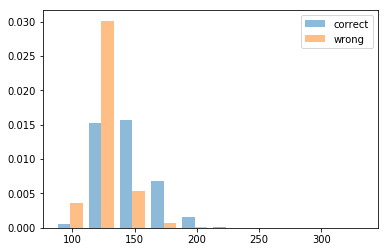

In [10]:
bins = [35,45,55,60,65,70]
plt.hist([correct_scroes,wrong_scores], 10, alpha=0.5, label=['correct','wrong'],density=True)
# plt.hist(wrong_scores, 10, alpha=0.5, label='wrong')
plt.legend(loc='upper right')
# plt.show()

In [11]:
# check unigrams intersection with other relations, both on tokens and entities
# on train as well
for d in result_per_type['member of'][1]:
    show_set(d)
    print()
    

KeyError: 'member of'

In [12]:
def show_statson_all_relation(correct = 0):
    pred_acc = []
    scores_result = []
    std_result = [] 
    for k,v in result_per_type.items():
        scores_category = np.array(list(map(lambda x: x['scores'][int(x['prediction'])],v[correct])))
        pred_acc.append(len(v[1])/(len(v[0])+len(v[1]))*100)
        scores_result.append(scores_category.mean())
        std_result.append(scores_category.std())
        print(f"{k}:\t {scores_category.mean():.2f} +- {scores_category.std():.2f} ; {len(v[1])/(len(v[0])+len(v[1]))*100:.2f}%")
    #     print( k ,scores_category.mean(), "+-",scores_category.std(), " Acc is:", len(v[1])/(len(v[0])+len(v[1])))
    pred_acc = np.array(pred_acc)
    scores_result = np.array(scores_result)
    std_result = np.array(std_result)
#     X = np.stack((pred_acc,scores_result),axis=0)
#     print(np.cov(X))
#     print(np.corrcoef(np.stack((pred_acc,scores_result),axis=0)))
    return pred_acc,scores_result,std_result

In [13]:
pred_acc,scores_result_correct,std_result_correct = show_statson_all_relation(1)

participant:	 140.59 +- 26.04 ; 71.17%
movement:	 135.82 +- 13.08 ; 84.81%
subsidiary:	 131.72 +- 10.79 ; 88.00%
followed by:	 137.26 +- 25.02 ; 58.17%
owned by:	 123.61 +- 10.02 ; 55.20%
residence:	 131.70 +- 11.12 ; 78.93%
operator:	 131.47 +- 14.94 ; 66.38%
country:	 136.26 +- 14.08 ; 85.14%
after a work by:	 133.52 +- 8.34 ; 93.78%
composer:	 137.19 +- 12.79 ; 92.80%
sibling:	 145.70 +- 13.82 ; 98.23%
instance of:	 126.37 +- 15.79 ; 49.80%
record label:	 134.32 +- 11.74 ; 92.82%
mouth of the watercourse:	 171.77 +- 13.96 ; 96.10%
applies to jurisdiction:	 135.69 +- 13.48 ; 88.79%
taxon rank:	 176.97 +- 21.28 ; 100.00%
field of work:	 146.92 +- 20.61 ; 84.55%
manufacturer:	 135.25 +- 11.46 ; 91.70%
military branch:	 151.08 +- 14.54 ; 96.19%
platform:	 156.88 +- 12.17 ; 98.68%
winner:	 136.39 +- 16.34 ; 81.50%
tributary:	 176.71 +- 15.22 ; 97.86%
headquarters location:	 134.77 +- 12.61 ; 87.61%
screenwriter:	 132.59 +- 7.35 ; 88.32%
characters:	 135.04 +- 12.05 ; 86.02%
notable work:

In [14]:
from scipy.stats import pearsonr


In [15]:
pearsonr(pred_acc,scores_result_correct)


(0.6639303299620071, 1.2129166352786238e-06)

In [16]:
pred_acc,scores_result_wrong,std_result_wrong = show_statson_all_relation(0)

participant:	 124.46 +- 12.10 ; 71.17%
movement:	 128.50 +- 10.63 ; 84.81%
subsidiary:	 126.56 +- 11.14 ; 88.00%
followed by:	 124.80 +- 12.03 ; 58.17%
owned by:	 117.81 +- 9.65 ; 55.20%
residence:	 123.19 +- 7.65 ; 78.93%
operator:	 122.23 +- 10.99 ; 66.38%
country:	 128.12 +- 10.84 ; 85.14%
after a work by:	 129.68 +- 6.23 ; 93.78%
composer:	 126.14 +- 10.26 ; 92.80%
sibling:	 131.67 +- 8.98 ; 98.23%
instance of:	 121.35 +- 13.09 ; 49.80%
record label:	 121.32 +- 6.82 ; 92.82%
mouth of the watercourse:	 172.96 +- 21.41 ; 96.10%
applies to jurisdiction:	 126.12 +- 9.96 ; 88.79%
taxon rank:	 nan +- nan ; 100.00%
field of work:	 127.39 +- 11.44 ; 84.55%
manufacturer:	 129.80 +- 10.35 ; 91.70%
military branch:	 134.95 +- 7.23 ; 96.19%
platform:	 156.01 +- 9.66 ; 98.68%
winner:	 122.64 +- 12.13 ; 81.50%
tributary:	 179.27 +- 22.19 ; 97.86%
headquarters location:	 128.72 +- 9.96 ; 87.61%
screenwriter:	 128.73 +- 7.04 ; 88.32%
characters:	 127.64 +- 8.55 ; 86.02%
notable work:	 125.27 +- 6.

In [17]:
pearsonr(pred_acc,scores_result_wrong)

(nan, 1.0)

In [18]:
from sklearn.metrics import confusion_matrix
mapping_rel_to_index = {}
for i,r in enumerate(result_per_type.keys()):
    mapping_rel_to_index[r] = i

In [19]:
labels = [x for x in result_per_type.keys()]
cm = confusion_matrix(gold_list, pred_list, labels)
print(cm)
lcm = [[np.log1p(x) for x in row] for row in cm ]



[[158   1   0 ...   1   0   1]
 [  0 201   0 ...   1   3   0]
 [  0   0 220 ...   0   0   0]
 ...
 [  0   0   1 ... 167   0   0]
 [  0   0   0 ...   0 213   0]
 [  0   0   0 ...   0   1 221]]


[Text(0, 0.5, 'particip'),
 Text(0, 1.5, 'movement'),
 Text(0, 2.5, 'subsidia'),
 Text(0, 3.5, 'followed'),
 Text(0, 4.5, 'owned by'),
 Text(0, 5.5, 'residenc'),
 Text(0, 6.5, 'operator'),
 Text(0, 7.5, 'country'),
 Text(0, 8.5, 'after a '),
 Text(0, 9.5, 'composer'),
 Text(0, 10.5, 'sibling'),
 Text(0, 11.5, 'instance'),
 Text(0, 12.5, 'record l'),
 Text(0, 13.5, 'mouth of'),
 Text(0, 14.5, 'applies '),
 Text(0, 15.5, 'taxon ra'),
 Text(0, 16.5, 'field of'),
 Text(0, 17.5, 'manufact'),
 Text(0, 18.5, 'military'),
 Text(0, 19.5, 'platform'),
 Text(0, 20.5, 'winner'),
 Text(0, 21.5, 'tributar'),
 Text(0, 22.5, 'headquar'),
 Text(0, 23.5, 'screenwr'),
 Text(0, 24.5, 'characte'),
 Text(0, 25.5, 'notable '),
 Text(0, 26.5, 'work loc'),
 Text(0, 27.5, 'genre'),
 Text(0, 28.5, 'sports s'),
 Text(0, 29.5, 'occupati'),
 Text(0, 30.5, 'language'),
 Text(0, 31.5, 'located '),
 Text(0, 32.5, 'occupant'),
 Text(0, 33.5, 'operatin'),
 Text(0, 34.5, 'licensed'),
 Text(0, 35.5, 'instrume'),
 Text(0, 

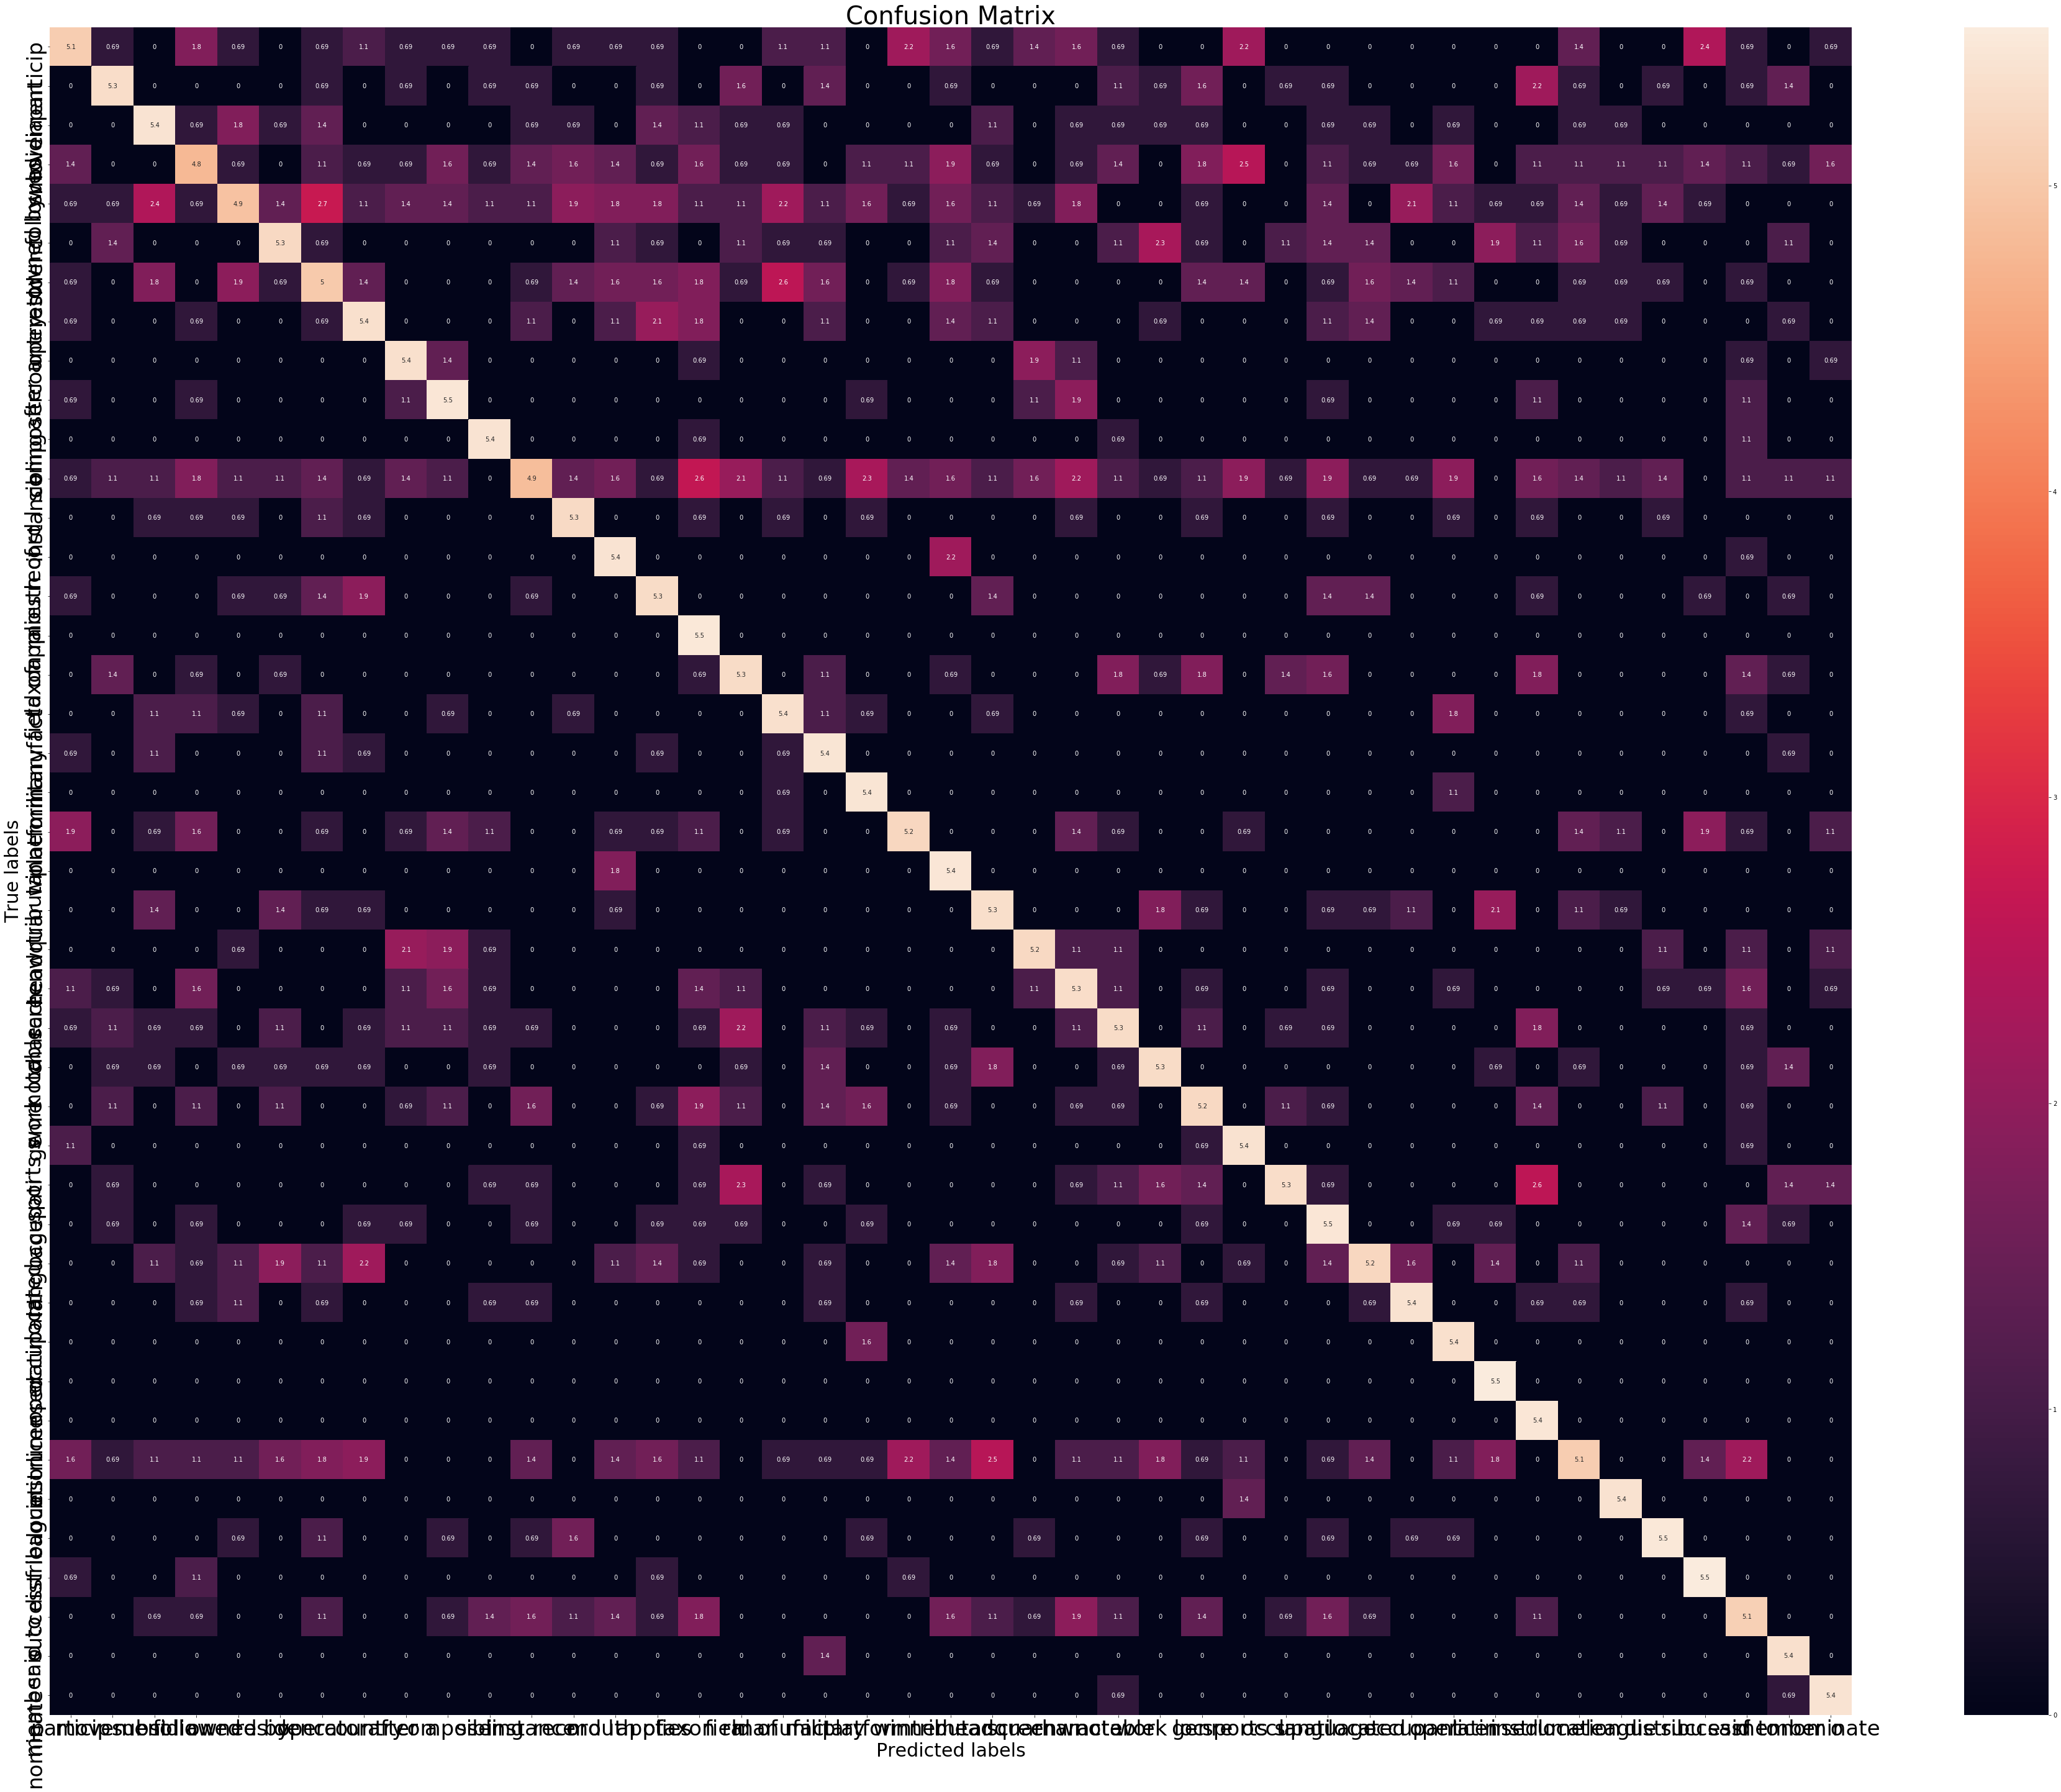

In [20]:
import seaborn as sns

fig = plt.figure(figsize=(65,50))
# ax = fig.add_subplot(111)
ax= plt.subplot()
sns.heatmap(lcm, annot=True, ax = ax) #annot=True to annotate cells
# sns.set(font_scale=-4.4)
# labels, title and ticks

ax.set_xlabel('Predicted labels',fontsize=30);ax.set_ylabel('True labels',fontsize=30); 
ax.set_title('Confusion Matrix',fontsize=40); 
ax.xaxis.set_ticklabels([x[:8] for x in result_per_type.keys()],fontsize=34)
ax.yaxis.set_ticklabels([x[:8] for x in result_per_type.keys()],fontsize=34)



In [21]:
this_dict = {}
for k,v in wrong_prediction_which_rel.items():
    this_dict[k] = [rel_type for rel_type,count in v.most_common()[:5]]
this_dict

{'followed by': ['sports season of league or competition',
  'tributary',
  'genre',
  'record label',
  'composer'],
 'residence': ['work location',
  'licensed to broadcast to',
  'location',
  'located in the administrative territorial entity',
  'headquarters location'],
 'manufacturer': ['operating system',
  'followed by',
  'military branch',
  'subsidiary',
  'operator'],
 'instance of': ['taxon rank',
  'platform',
  'characters',
  'field of work',
  'language of work or name'],
 'owned by': ['operator',
  'subsidiary',
  'manufacturer',
  'occupant',
  'record label'],
 'headquarters location': ['licensed to broadcast to',
  'work location',
  'subsidiary',
  'residence',
  'occupant'],
 'screenwriter': ['after a work by',
  'composer',
  'said to be the same as',
  'notable work',
  'nominated for'],
 'occupation': ['instrument',
  'field of work',
  'work location',
  'nominated for',
  'genre'],
 'notable work': ['field of work',
  'instrument',
  'after a work by',
  'mi

In [ ]:
# check agremment with the model prediction 
# try to come up with b=new baselines to show that data is no good
# Elmo should do worse?
# only entity type is helpful?
